# Chapter 11. Systems of Nonlinear Differential Equations

### Contents

* Autonomous Systems
* Stability of Linear Systems
* Linearization and Local Stability
* Autonomous Systems as Mathematical Models
* Periodic Solutions, Limit Cycles, and Global Stability

## 11.1 Autonomous Systems

A system of first-order differential equations is called **autonomous** when the system can be written in the form

>$
\begin{align*}
 \frac{dx_1}{dt} &=g_1(x_1,x_2,\cdots,x_n) \\ 
 \frac{dx_2}{dt} &=g_2(x_1,x_2,\cdots,x_n) \\ 
    & \;\vdots \\ 
 \frac{dx_n}{dt} &=g_n(x_1,x_2,\cdots,x_n)
\end{align*}
$

Notice that the independent variable $t$ does not appear explicitly on the right-hand side of each differential
equation.

* **Second-Order DE as a System**

  Any second-order differential equation $x''=g(x,x')$ can be written as an autonomous system. 
  If we let $y=x'$, the second-order differential equation becomes the system of two first-order equations
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= g(x,y) 
  \end{align*}
  $
  
  ---
  
  **Example:** The displacement angle $\theta$ for a pendulum satisfies the nonlinear second-order
  differential equation
  
  >$\displaystyle\frac{d^2 \theta}{dt^2} +\frac{g}{l}\sin\theta=0$
  
  If we let $x=\theta$ and $y=\theta'$, this second-order differential equation can be written as the autonomous system
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= -\frac{g}{l}\sin x
  \end{align*}
  $

  ---
  
* **Plane Autonomous System**
  
  When $n=2$, the system is called a **plane autonomous system**, and we write the system as
  
  >$\displaystyle
  \begin{align*}
     \frac{dx}{dt} &= P(x,y)\\ 
     \frac{dy}{dt} &= Q(x,y)
  \end{align*}
  $
  
  If $P(x,y)$, $Q(x,y)$, and the first-order partial derivatives $\partial P/\partial x$,
  $\partial P/\partial y$, $\partial Q/\partial x$, and $\partial Q/\partial y$ are continuous in a
  region $R$ of the plane, then a solution to the plane autonomous system that satisfies 
  $\mathbf{x}(0)=\mathbf{x}_0$ is unique and one of three basic types:
  
    * A **constant solution**, $\mathbf{x}(t)=\mathbf{x}_0$ for all $t$. 
    A constant solution is called a **critical** or **stationary point**. Note that since $\mathbf{x}'=\mathbf{0}$,
    a critical point is a solution of the system of algebraic equations
    
    >$\displaystyle
      \begin{align*}
         P(x,y) &= 0\\ 
         Q(x,y) &= 0
      \end{align*}
    $
    
    * An **arc**, $\mathbf{x}(t)$ - a plane curve that does not cross itself
    
    <img src="figures/ch11_figure01.png" width="200">
    
    * A **periodic solution** or **cycle**, $\mathbf{x}(t +p)=\mathbf{x}(t)$
    
    <img src="figures/ch11_figure02.png" width="100"> 

### Exercises 11.1

* 1

## 11.2 Stability of Linear Systems

If $\mathbf{x}_1$ is a critical point of a plane autonomous system and $\mathbf{x}=\mathbf{x}(t)$ is a solution
satisfying $\mathbf{x}(0)=\mathbf{x}_0$, 

>when $\mathbf{x}_0$ is placed near $\mathbf{x}_1$.

<img src="figures/ch11_figure03.png" width="150">

>**(a)** It may return to the critical point <br>
**(b)** It may remain close to the critical point without returning <br>
**(c)** It may move away from the critical point





* **Stability Analysis**

  A careful geometric analysis of the solutions to the *linear* plane autonomous system
  
  >$
    \begin{align*}
       x'&= ax +by\\ 
       y'&= cx +dy
    \end{align*}
   $
  
  in terms of the eigenvalues and eigenvectors of the coefficient matrix
  
  >$\mathbf{A}=
    \begin{pmatrix}
     a & b\\ 
     c & d
    \end{pmatrix}
   $
   
  drives the stabilty analysis. 
  
  To ensure that $\mathbf{x}_0=(0,\,0)$ is the only critical point,
  we will assume that the determinant $\Delta = ad -bc \neq 0$. If $\tau = a + d$ is the trace of matrix $\mathbf{A}$,
  then the characteristic equation $\mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=0$ can be rewritten as
  
  >$\lambda^2 -\tau\lambda +\Delta =0$
  
  Therefore the eigenvalues of $\mathbf{A}$ are 
  
  >$\displaystyle\lambda =\frac{\tau \pm \sqrt{\tau^2 -4\Delta}}{2}$
  
  and the usual three cases for these roots occur according to whether $\tau^2 -4\Delta$ is positive, negative,
  or zero.

**Example:** Find the eigenvalues of the linear system

>$
    \begin{align*}
       x'&= -x +y\\ 
       y'&= cx -y
    \end{align*}
 $
 
in terms of $c$, and use a numerical solver to discover the shapes of solutions corresponding to the cases
$c=\frac{1}{4}$, $4$, $0$, and $-9$. $\mathbf{A}$ has trace $\tau=-2$ and determinant $\Delta=1 -c$, 
and so the eigenvalues are

>$
  \lambda =-1 \pm \sqrt{c}
 $
 
The nature of the eigenvalues is therefore determined by the sign of $c$ 
 

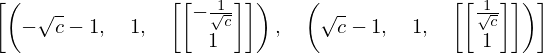

In [70]:
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)

c, x, y = sp.symbols('c x y')
A = sp.Matrix([[-1, 1], [c, -1]])
A.eigenvects()

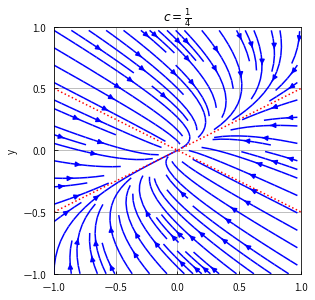

In [93]:
w = 1
xs = np.linspace(-w, w, 50)
ys = np.linspace(-w, w, 50)
x, y = np.meshgrid(xs, ys)

c_ = 1/4
xdot = -x +y
ydot = c_*x -y

y_1 = -np.sqrt(c_)*xs
y_2 = np.sqrt(c_)*xs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.streamplot(x, y, xdot, ydot, color='blue')
ax.plot(xl, y_1, 'r:', xl, y_2, 'r:')
ax.set_title(r'$c=\frac{1}{4}$')
ax.set_aspect(aspect='equal')
ax.axis((-w, w, -w, w))
ax.xaxis.set_ticks([-1, -1/2, 0, 1/2, 1])
ax.yaxis.set_ticks([-1, -1/2, 0, 1/2, 1])
#ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.tick_params(axis='both', direction='in', pad=8)
plt.show()

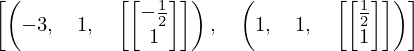

In [14]:
c = 4
A = np.array([[-1, 1], [c, -1]])
A_ = sympy.Matrix(A)
A_.eigenvects()

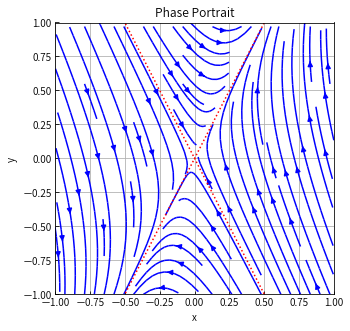

In [15]:
w = 1
xl = np.linspace(-w, w, 50)
yl = np.linspace(-w, w, 50)
x, y = np.meshgrid(xl, yl)

xdot = -x +y
ydot = c*x -y

y_1 = -2*xl
y_2 = 2*xl

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.streamplot(x, y, xdot, ydot, color='blue')
ax.plot(xl, y_1, 'r:', xl, y_2, 'r:')
ax.set_title('Phase Portrait')
ax.axis((-w, w, -w, w))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.tick_params(axis='both', direction='in')
plt.show()

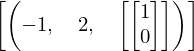

In [36]:
c = 0
A = np.array([[-1, 1], [c, -1]])
A_ = sympy.Matrix(A)
A_.eigenvects()

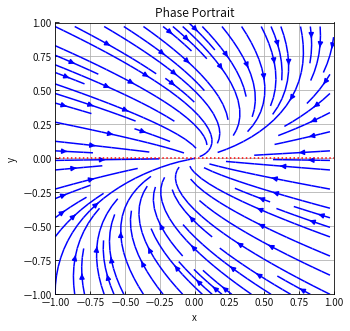

In [37]:
w = 1
xl = np.linspace(-w, w, 50)
yl = np.linspace(-w, w, 50)
x, y = np.meshgrid(xl, yl)

xdot = -x +y
ydot = c*x -y

yl = 0*xl

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.streamplot(x, y, xdot, ydot, color='blue')
ax.plot(xl, yl, 'r:')
ax.set_title('Phase Portrait')
ax.axis((-w, w, -w, w))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.tick_params(axis='both', direction='in')
plt.show()

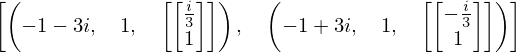

In [18]:
c = -9
A = np.array([[-1, 1], [c, -1]])
A_ = sympy.Matrix(A)
A_.eigenvects()

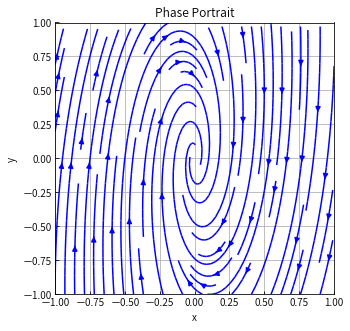

In [19]:
w = 1
xl = np.linspace(-w, w, 50)
yl = np.linspace(-w, w, 50)
x, y = np.meshgrid(xl, yl)

xdot = -x +y
ydot = c*x -y

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.streamplot(x, y, xdot, ydot, color='blue')
ax.set_title('Phase Portrait')
ax.axis((-w, w, -w, w))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.tick_params(axis='both', direction='in')
plt.show()